<a href="https://colab.research.google.com/github/patelmedha/Prediction-of-Product-Sales/blob/main/PREDICTION_OF_PRODUCT_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**
**Author: Medha Patel**

## **Project Overview**

  This project aims to help retailers understand the properties of their products and outlets that play crucial roles in increasing sales. Using data analysis and machine learning techniques, the project will identify the most significant factors that influence sales performance and explore segmentation strategies to group similar products and outlets together. The goal is to provide retailers with a comprehensive understanding of their sales data and enable them to make data-driven decisions that increase revenue, improve customer satisfaction, and drive long-term success. An interactive dashboard will allow retailers to visualize and explore the data, experiment with input parameters, and generate custom reports.

### Data Dictionary

  - **Item_Identifier**: Unique product ID
  - **Item_Weight**: Weight of product
  - **Item_Fat_Content**: Whether the product is low fat or regular
  - **Item_Visibility**: The percentage of total display area of all products in store allocated to the particular product
  - **Item_Type**: The category to which the product belongs
  - **Item_MRP**: Maximum Retail Price (list price) of the product
  - **Outlet_Identifier**: Unique store ID
  - **Outlet_Establishment_Year**: The year in which store was established
  - **Outlet_Size**: The size of the store in terms of ground area covered
  - **Outlet_Location_Type**: The type of area in which the store is located
  - **Outlet_Type**: Whether the outlet is a grocery store or some sort of supermarket
  - **Item_Outlet_Sales**: Sales of product in particular store. This is the target variable to be predicted





## **Load and Inspect Data**

Import Libraries

In [208]:
#Imports
## Pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Numpy
import numpy as np

##Seaborn
import seaborn as sns

##Matplotlib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Regression Model IMPORTS
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## REGRESSION METRIX
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

!pip install pandas

In [209]:
!pip install sklearn

### **Load Data**

In [210]:
#Load Data
file = 'Data/sales_predictions_2023.csv'

df = pd.read_csv(file)

#Copy of Dataframe
df_ml = df.copy()

### **Inspect Data**

#### **Head()**

In [211]:
#Head()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### **shape()**

In [212]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 8523 rows, and 12 columns.


#### **dtypes**

In [213]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### **Info()**

In [214]:
#Info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **describe()**

In [215]:
#Descriptive statistics for numeric columns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [216]:
#Descriptive statistics for categoric columns
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


## **Clean Data**

#### **Dropping/Replacing Columns**

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **Duplicated Data**


In [218]:
dup_rows = df.duplicated().sum()
print(f'There are {dup_rows} duplicate rows.')

There are 0 duplicate rows.


#### **Unique Values**

In [219]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [220]:
#Unique Value percentage
unique_percentage = df.nunique()/len(df) * 100
unique_percentage

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

#### **Missing Values**

In [221]:
#Finding number of missing values
missing_values = df.isna().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [222]:
#percent of missing_values
missing_values_percent = missing_values/len(df) * 100
missing_values_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

#### **Fixing Data Types**

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **Visualizing Missing Values with Missingno**

In [228]:
import missingno as msno
!pip install --upgrade missingno
!pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 11.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


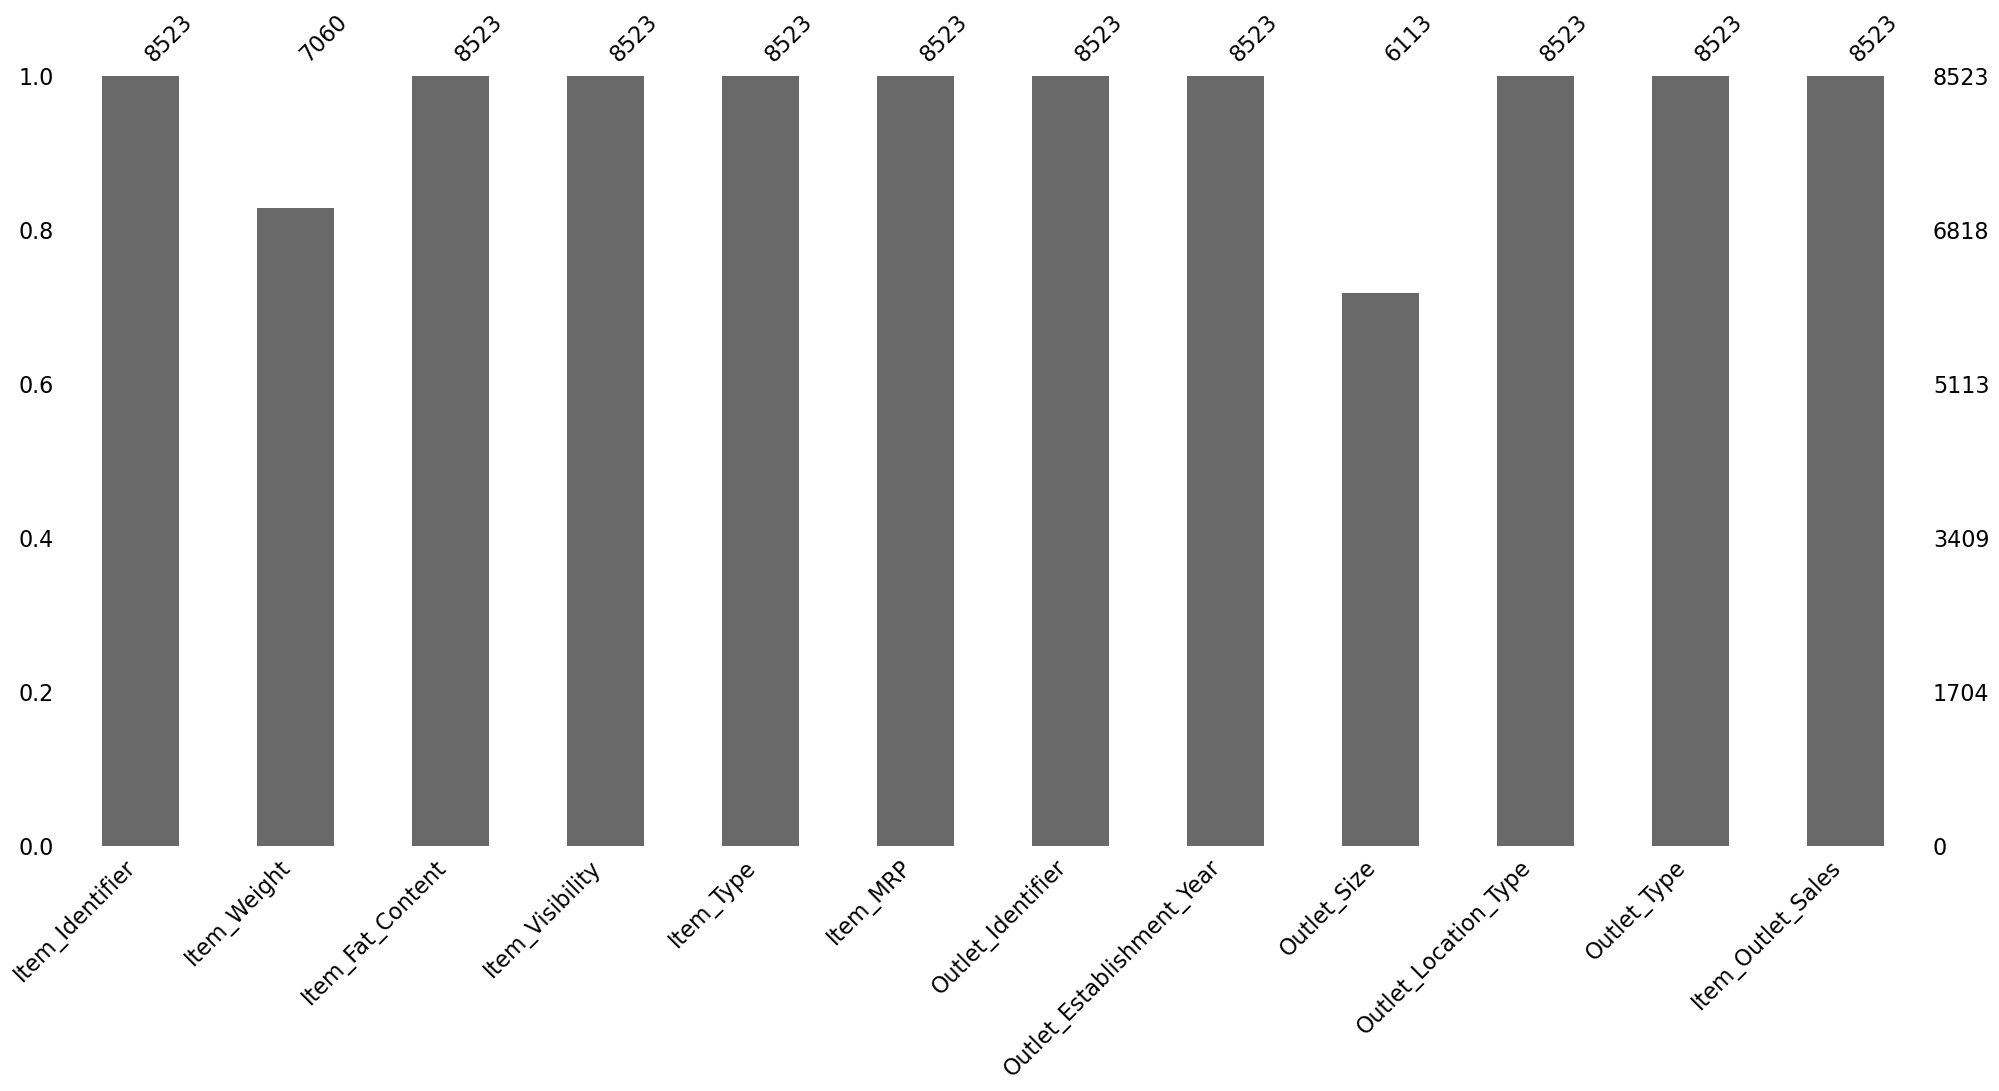

In [234]:
msno.bar(df);

##### **Address the Null Values**


###### **Null Values in Categorical Columns**

In [235]:
# save list of categorical column name.
categorical_col = df.select_dtypes('object').columns
categorical_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [236]:
# Check for nunique for categorical columns
for col in categorical_col:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


#### **Data Consistency**

#####  **Data Consistency- Categorical Columns**




In [237]:
# Item_Fat_Content- fix the values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat' , 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg' , 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

######  **Replacing Data in Categorical Columns**
- **Drop the column**
 - con: This would result in a significant loss of data.
 - +50% missing values per row would be significant enough to justify this option.

- **Drop rows with missing values**
 - con: This would result in a significant loss of data.
 - +5% missing values per column would too great to justify this option, however -5% missing values would justify this option.

- **Replace missing values with the value 'Unknown'**
 - pro: This typically will not create bias in favor of a specific label or class.
 - con: This will not factor correlations between features.

- **Impute missing values using the most frequent value, 'mode', value of the column**
 - pro: This typically works well with small numeric datasets.
 - con: This may create bias in favor of a specific label or class.
 - con: This will not factor correlations between features.


In [238]:
#Replace missing categorical column values with 'Unknown'

df['Outlet_Size'] = df['Outlet_Size'].fillna('Unknown')


- Replacing with 'Unknown' since, about 28% of the data is missing. This is to avoid any bias, or significant loss of data.

##### **Data Consistency- Numerical Columns**

In [239]:
# Have list of numerical column name.
numerical_col = df.select_dtypes(['int', 'float']).columns
numerical_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [240]:
# check for nunique for numerical columns
for col in numerical_col:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


Value Counts for Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value Counts for Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


Value Counts for Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


Value Counts for Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845

###### **Replacing Data in Numeric Columns**
- **Drop the column**
 - con: This would result in a significant loss of data.
 - +50% missing values per row would be significant enough to justify this option.

- **Drop rows with missing values**
 - con: This would result in a significant loss of data.
 - +5% missing values per column would too great to justify this option, however -5% missing values would justify this option.

- **Impute missing values using the 'mean' value of the column**
 - pro: This typically works well with small numeric datasets.
 - con: This can introduce bias and is affected by skew and outliers more than the 'median' value.
 - con: This will not factor correlations between features.

- **Impute missing values using the 'median' value of the column**
 - pro: This typically works well with small numeric datasets.
 - pro: This is less affected by outliers than strategy = 'mean'.
 - con: This will not factor correlations between features.

In [241]:
import statistics as stat
weight_median = df['Item_Weight'].median()

In [242]:
# Impute missing values using 'median' value
df['Item_Weight'] = df['Item_Weight'].fillna(weight_median)


- Replacing with 'median' value since, about 17% of the data is unknown- to avoid any bias, or losing valueable data. Using Median to replace missing values since it is less affected by skew and outliers.

In [243]:
#checking Data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [244]:
#Descriptive data for numerical columns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


#### Summary Statistic for Numerical Columns
For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [245]:
df.describe(include = 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## **Exploratory Data Analysis**

### **Categorical Columns**

In [246]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


#### **'Item_Fat_Content' column**

In [247]:
## Display the value counts for the column
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [248]:
## Display the descriptive statistics for the column
df['Item_Fat_Content'].describe()

count        8523
unique          2
top       Low Fat
freq         5517
Name: Item_Fat_Content, dtype: object

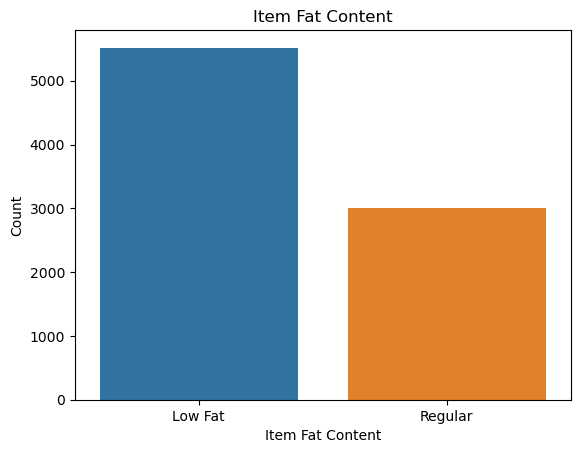

In [249]:
# Define ax using seaborn.countplot()
ax = sns.countplot(data=df, x ='Item_Fat_Content')
#Set title, and axis label name
ax.set_xlabel('Item Fat Content')
ax.set_ylabel('Count')
ax.set_title('Item Fat Content');

Interpretation:
  - Low Fat Content has a higher count of instances compared to Regular Fat Content.

#### **'Item_Type' column**

In [250]:
## Display the descriptive statistics for the column
df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [251]:
## Display the value counts for the column in descending order
count_item_type = df['Item_Type'].value_counts().sort_values(ascending = False)
count_item_type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

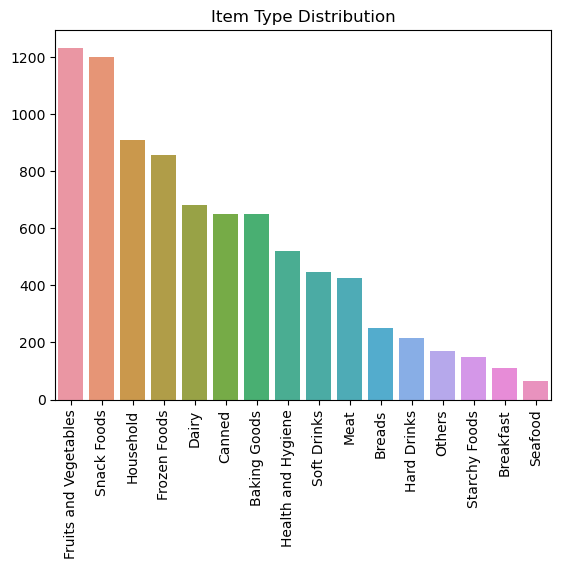

<Figure size 1800x800 with 0 Axes>

In [252]:
#Define ax using seaborn.barplot()
ax = sns.barplot(data=df, x= count_item_type.index, y= count_item_type.values)
plt.figure(figsize = (18,8));

#Rotate x-axis to avid overlap
ax.tick_params(axis='x', rotation = 90)
#Set the title
ax.set_title("Item Type Distribution")
#set x-axis and y-axis labels
ax.set_xlabel = ('Item Type')
ax.set_ylabel = ('Count');

Interpretation:
  - Fruits and Vegetables has the highest count of instances.
  - Seafood has the lowest count of instances.

#### **'Outlet_Identifier' column**

In [253]:
## Display the value counts for the column
count_outlet_identifier = df['Outlet_Identifier'].value_counts().sort_values( ascending = False)
count_outlet_identifier


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [254]:
## Display the descriptive statistics for the column
df['Outlet_Identifier'].describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

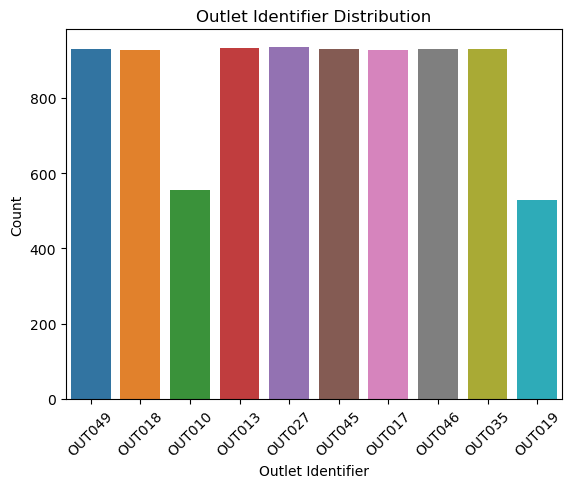

In [255]:
# Define ax using seaborn.countplot()
ax = sns.countplot(data=df, x = 'Outlet_Identifier')
#Rotate x-axis to avid overlap
ax.tick_params(axis='x', rotation = 45)
#Set title, and axis label name
ax.set_xlabel('Outlet Identifier')
ax.set_ylabel('Count')
ax.set_title('Outlet Identifier Distribution');

Interpretation:
  - OUT027 has the highest count of instances.
  - OUT019 has the lowest count of instances.

#### **'Outlet_Size' column**

In [256]:
## Display the value counts for the column
count_outlet_size = df['Outlet_Size'].value_counts()
count_outlet_size

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [257]:
## Display the descriptive statistics for the column
df['Outlet_Size'].describe()

count       8523
unique         4
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

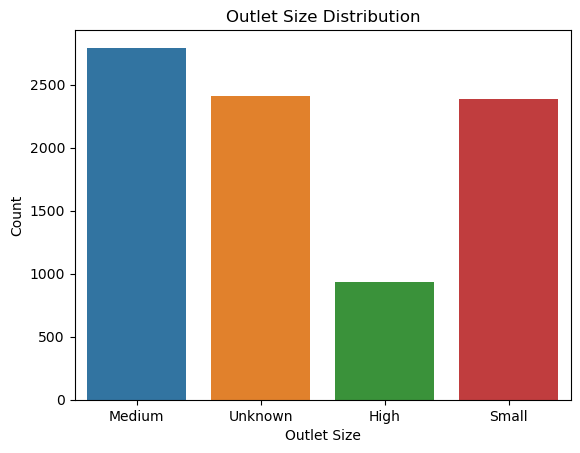

In [258]:
# Define ax using seaborn.countplot()
ax = sns.countplot(data=df, x = 'Outlet_Size')
#Set title, and axis label name
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Count')
ax.set_title('Outlet Size Distribution');

Interpretation:
- Medium Outlet Size has the highest count of instances.
- High Outlet Size has the lowest count of instances.

#### **'Outlet_Location_Type' column**

In [259]:
## Display the value counts for the column
df['Outlet_Location_Type'].value_counts().sort_values()

Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

In [260]:
## Display the descriptive statistics for the column
df['Outlet_Location_Type'].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

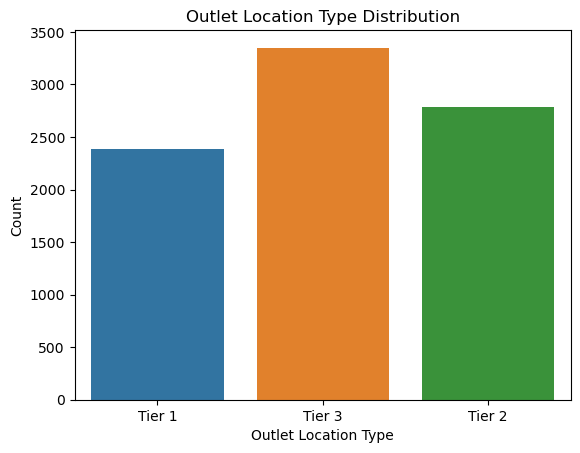

In [261]:
# Define ax using seaborn.countplot()
ax = sns.countplot(data=df, x = 'Outlet_Location_Type')
#Set title, and axis label name
ax.set_xlabel('Outlet Location Type')
ax.set_ylabel('Count')
ax.set_title('Outlet Location Type Distribution');

Interpretation:
  - Tier 3 Outlet Location Type has the highest count of instances.
  - Tier 1 Outlet Location Type has the lowest count of instances.


#### **'Outlet_Type' column**

In [262]:
## Display the value counts for the column
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [263]:
## Display the descriptive statistics for the column
df['Outlet_Type'].describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

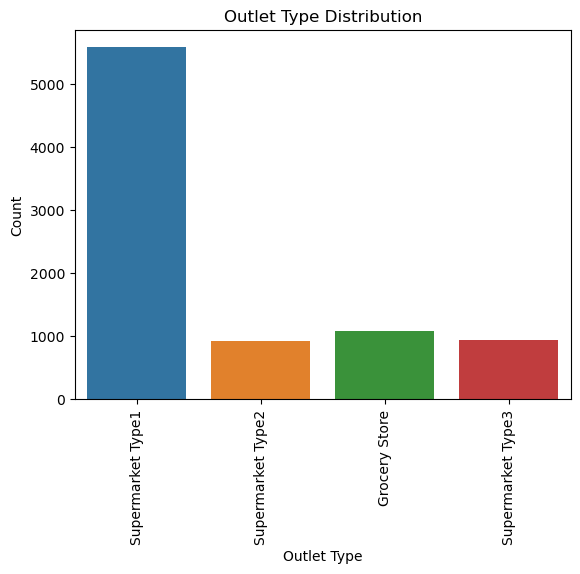

In [264]:
# Define ax using seaborn.countplot()
ax = sns.countplot(data=df, x = 'Outlet_Type')
#Rotate x-axis to avid overlap
ax.tick_params(axis='x', rotation = 90)
#Set title, and axis label name
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Count')
ax.set_title('Outlet Type Distribution');

Interpretation:
  - Supermarket Type 1 has the highest count of instances.
  - Supermarket Type 2 has the lowest count of instances.


### **Numerical Columns**

In [265]:
## Display the descriptive statistics for the numeric columns
df.describe(include=('number'))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


#### **'Item_Weight' column**

In [266]:
### Display the value counts for the column
df['Item_Weight'].value_counts()

12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64

In [267]:
## Display the descriptive statistics for the column
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

- **'Item Weight' Histogram**

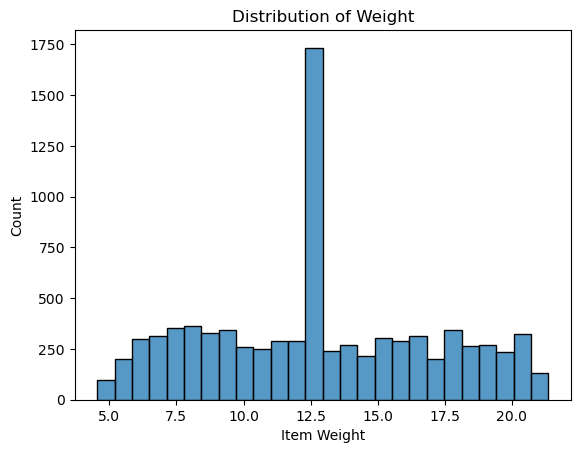

In [268]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
fig , ax = plt.subplots()

ax= sns.histplot(data = df, x = 'Item_Weight')




#Set title name and axis names
ax.set_title('Distribution of Weight')
ax.set_xlabel('Item Weight')
ax.set_ylabel("Count");

'Item Weight' Histogram Interpretation:
  - Values range from 4.55 to 21.35.
  - The median value is 12.6.
  - The data is very slightly negatively skewed.


- **'Item Weight' Boxplot**

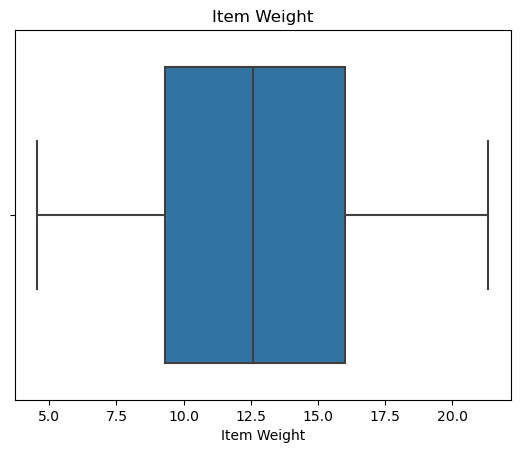

In [269]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Weight')

## Set the Title
ax.set_title('Item Weight')
ax.set_xlabel('Item Weight');

'Item Weight' Boxplot Interpretation:
  - The data is very slightly negatively skewed.
  - No outliers are noted.

#### **'Item_Visibility' column**

In [270]:
### Display the value counts for the column
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [271]:
## Display the descriptive statistics for the column
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

- **'Item Visibility' Histogram**

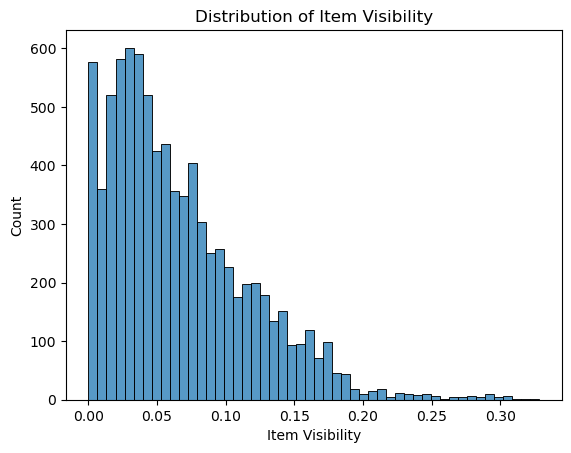

In [272]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
fig , ax = plt.subplots()

ax= sns.histplot(data = df, x = 'Item_Visibility')




#Set title name and axis names
ax.set_title('Distribution of Item Visibility')
ax.set_xlabel('Item Visibility')
ax.set_ylabel("Count");

'Item Visibility' Histogram Interpretation:
 - Values range from 0.000 to 0.328.
 - The median value is 0.053.
 - The data is very positively skewed.



- **'Item Visibility' Boxplot**

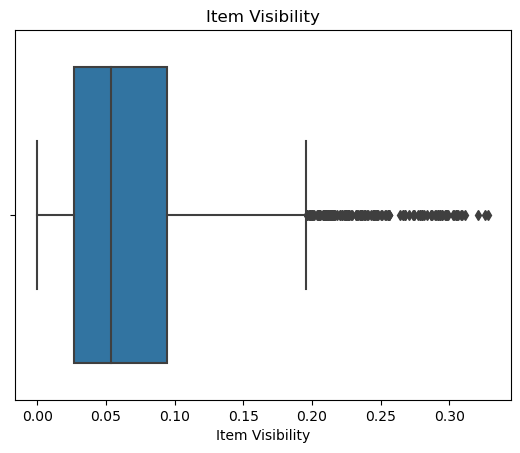

In [273]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Visibility')

## Set the Title ans x-axis label
ax.set_title('Item Visibility')
ax.set_xlabel('Item Visibility');


'Item Visibility' Boxplot Interpretation:
 - The data is very positively skewed.
 - Outliers are noted on the high side.


#### **'Item_MRP' column**

In [274]:
### Display the value counts for the column
df['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [275]:
## Display the descriptive statistics for the column
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

- **'Item MRP' Histogram**

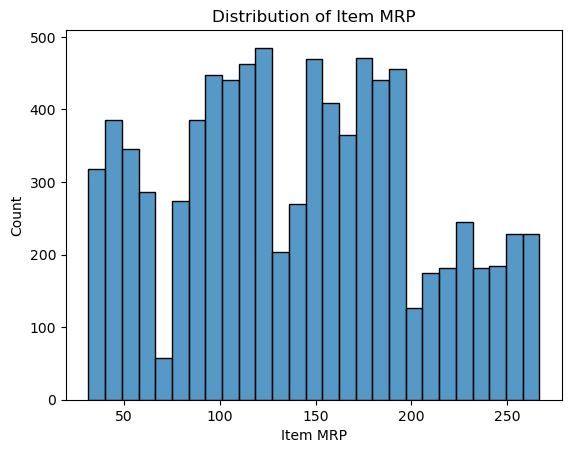

In [276]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
fig , ax = plt.subplots()

ax= sns.histplot(data = df, x = 'Item_MRP')


#Set title name and axis names
ax.set_title('Distribution of Item MRP')
ax.set_xlabel('Item MRP')
ax.set_ylabel("Count");

'Item MRP' Histogram Interpretation:
  - Values range from  31.29 to 266.88.
  - The median value is 143.01.
  - The data is very slightly negatively skewed.


**'Item MRP' Boxplot**

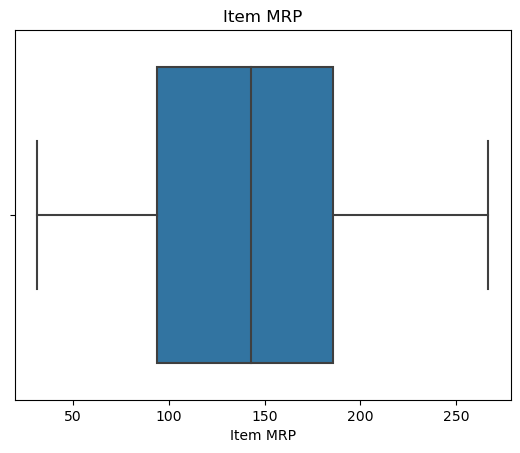

In [277]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_MRP')

## Set the Title
ax.set_title('Item MRP')
ax.set_xlabel('Item MRP');

'Item MRP' Boxplot Interpretation:
  - The data is very slightly negatively skewed.
  - No outliers are noted.

#### **'Outlet_Establishment_Year' column**

In [278]:
### Display the value counts for the column
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [279]:
## Display the descriptive statistics for the column
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

**'Outlet Establishment Year' Histogram**

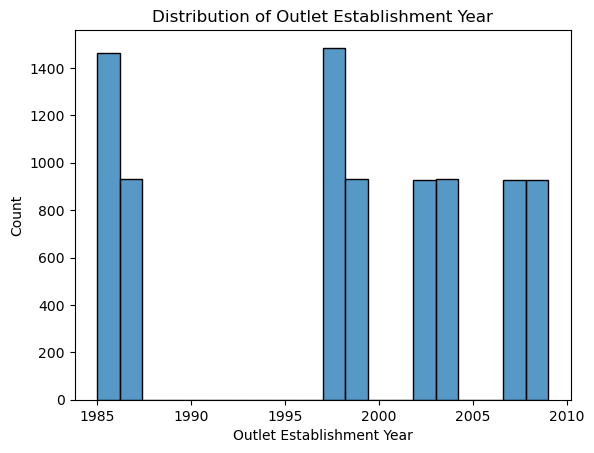

In [280]:
## Define a MatplotLib ax object using seaborn.histplot()
fig , ax = plt.subplots()

ax= sns.histplot(data = df, x = 'Outlet_Establishment_Year', bins = (20))


#Set title name and axis names
ax.set_title('Distribution of Outlet Establishment Year')
ax.set_xlabel('Outlet Establishment Year')
ax.set_ylabel("Count");

'Outlet Establishment Year' Histogram Interpretation:
  - Values range from  1985 to 2009.
  - The median value is 1999.
  - The data is very slightly negatively skewed.


**'Outlet Establishment Year' Boxplot**

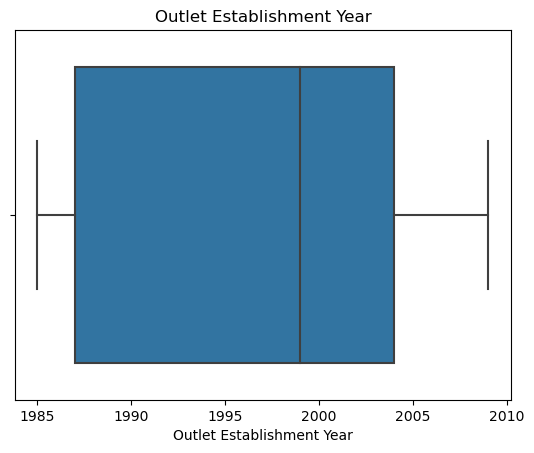

In [281]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Outlet_Establishment_Year')

## Set the Title
ax.set_title('Outlet Establishment Year')
ax.set_xlabel('Outlet Establishment Year');

'Outlet Establishment Year' Boxplot Interpretation:
  - The data is very slightly negatively skewed.
  - No outliers are noted.

#### **'Item_Outlet_Sales' column**

In [282]:
### Display the value counts for the column
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [283]:
## Display the descriptive statistics for the column
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

**'Item Outlet Sales' Histogram**

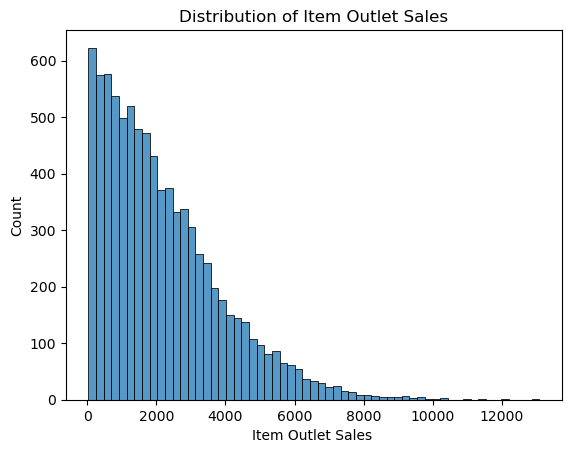

In [284]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
fig , ax = plt.subplots()

ax= sns.histplot(data = df, x = 'Item_Outlet_Sales')


#Set title name and axis names
ax.set_title('Distribution of Item Outlet Sales')
ax.set_xlabel('Item Outlet Sales ')
ax.set_ylabel("Count");

'Item Outlet Sales' Histogram Interpretation:
  - Values range from 33.29 to 13086.96.
  - The median value is 1794.33.
  - The data is very positively skewed


**'Item Outlet Sales' Boxplot**

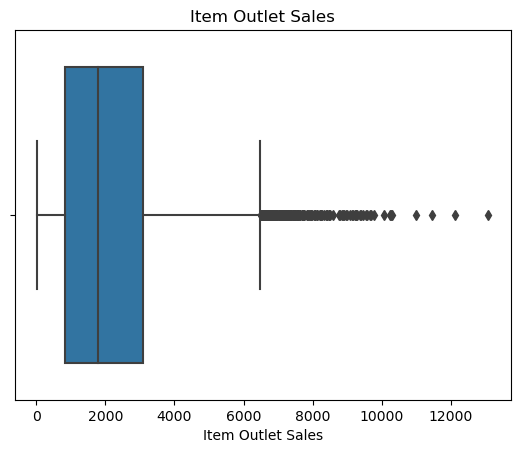

In [285]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Outlet_Sales')

## Set the Title
ax.set_title('Item Outlet Sales')
ax.set_xlabel('Item Outlet Sales');

'Item Outlet Sales' Boxplot Interpretation:
  - The data is very positively skewed .
  - Outliers are noted on the high end.

### **Correlation**

#### .corr() method

In [286]:
#To check all numeric features in the dataframe for correlations, use df.corr()
corr = df.corr()

corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


#### Heatmap of Correlations

- Heatmap of correlations will display any correlation between numeric features.

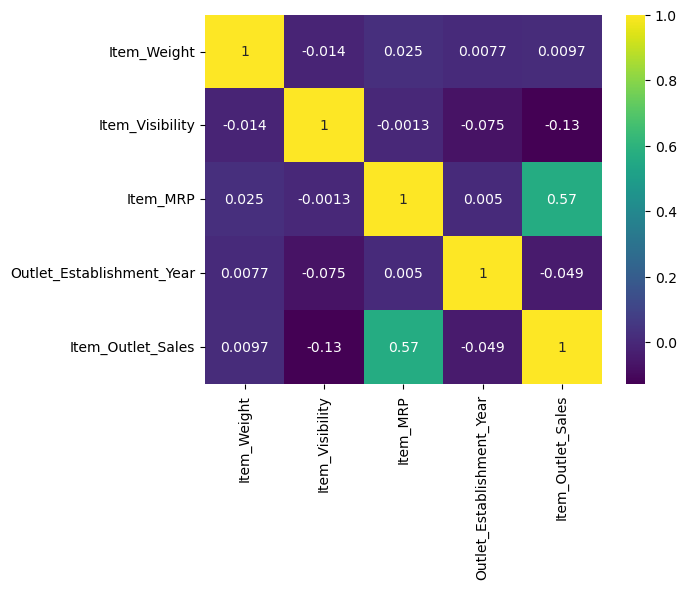

In [287]:
##Define Matplotlib fix and ax objects using plt.subplots()
## Use figsize= to set the size of the figure
fig, ax = plt.subplots()

##Define Matplotlib ax object using sns.heatmap()
##Use cmap= to define the color map
##Use annot= to annotate the correlation values
ax = sns.heatmap(corr, cmap = 'viridis', annot = True);

Interpretation of Heatmap:
  - The highest correlation is between Item_MRP and Item_Outlet Sales

## **Explanatory Data Analysis**

##### **Impact of Item MRP on Item Outlet Sales**

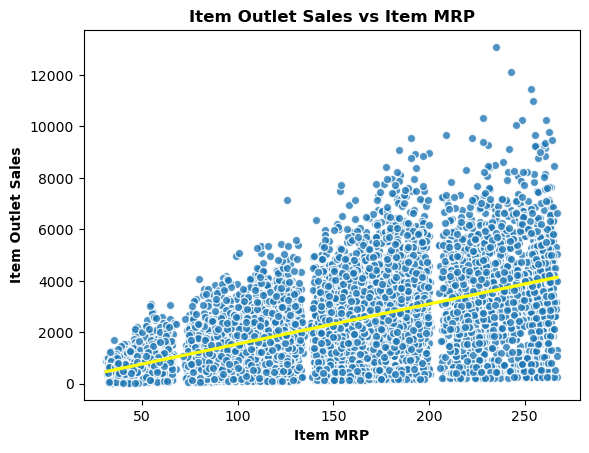

In [288]:
## Define a MatplotLib ax object using sns.regplot()

scatter_kws = dict(edgecolor='white')
ax = sns.regplot(data = df,
                 x ='Item_MRP',
                 y = 'Item_Outlet_Sales',
                 scatter_kws= scatter_kws,
                 line_kws = {'color':'yellow'})
## Set the Title
ax.set_title('Item Outlet Sales vs Item MRP', fontsize=12, fontweight = 'bold')
# Set Axes Labels
ax.set_xlabel('Item MRP', fontsize=10, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize=10, fontweight = 'bold');

- Prediction: Positive Correlation- Item MRP Influences Item Outlet Sales.

##### **Impact of Outlet Size on Outlet Sales**

In [289]:
count_outlet_size = df['Outlet_Size'].value_counts()
count_outlet_size

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

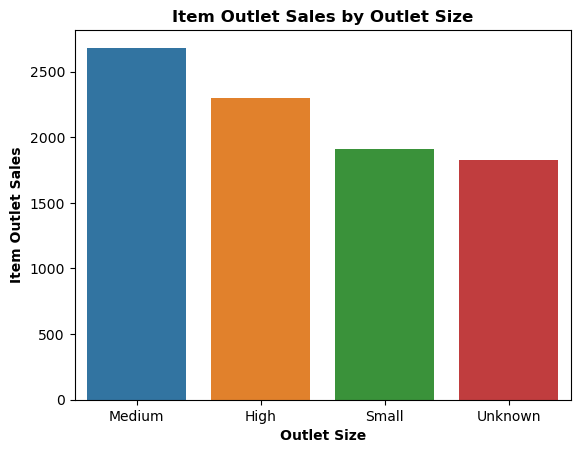

In [290]:
## Define label_order
outlet_size_sales_mean = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
outlet_size_sales_mean
## Define a MatplotLib ax object using sns.barplot()
fig, ax = plt.subplots()
ax = sns.barplot(data = df,
                 x ='Outlet_Size',
                 y = 'Item_Outlet_Sales',
                 order = outlet_size_sales_mean.index,
                 errorbar = None)
## Set the Title
ax.set_title('Item Outlet Sales by Outlet Size', fontsize=12, fontweight = 'bold')
# Set Axes Labels
ax.set_xlabel('Outlet Size', fontsize=10, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize=10, fontweight = 'bold');

- Prediction: Medium Outlets contribute the most towards Outlet Sales, while Unknown Outlet Size contribute the least.

##### **Impact of Item Type on Outlet Sales**

In [291]:
## Display the descriptive statistics for the column
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [292]:
#Item type sales in percent using groupby
total_item_type_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().round(2)
total_sales = df["Item_Outlet_Sales"].sum()
percent_item_type_sales = ((total_item_type_sales / total_sales)*100).sort_values(ascending=False)
percent_item_type_sales

Item_Type
Fruits and Vegetables    15.168849
Snack Foods              14.699412
Household                11.056317
Frozen Foods              9.820464
Dairy                     8.189897
Canned                    7.767962
Baking Goods              6.807148
Health and Hygiene        5.622038
Meat                      4.935503
Soft Drinks               4.802817
Breads                    2.975813
Hard Drinks               2.462430
Starchy Foods             1.890156
Others                    1.750930
Breakfast                 1.249515
Seafood                   0.800749
Name: Item_Outlet_Sales, dtype: float64

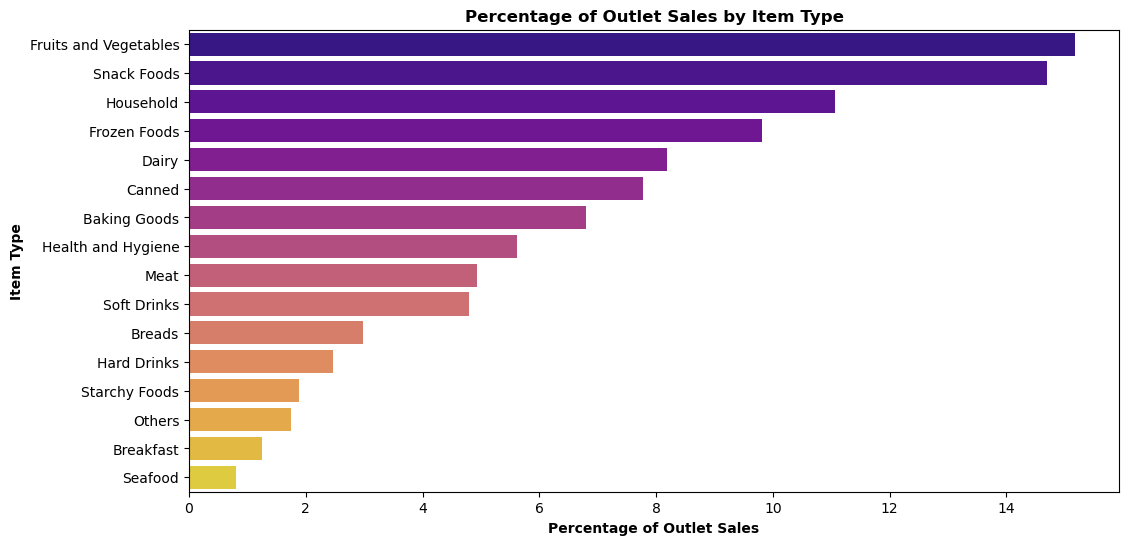

In [293]:
percent_item_type_sales = ((total_item_type_sales / total_sales) * 100).reset_index()

## Define a Matplotlib ax object using sns.barplot()
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=percent_item_type_sales,
                 y='Item_Type',
                 x='Item_Outlet_Sales',
                 order=percent_item_type_sales.sort_values('Item_Outlet_Sales', ascending=False)['Item_Type'],
                 errorbar=None,
                 palette = 'plasma')
## Set the Title
ax.set_title('Percentage of Outlet Sales by Item Type', fontsize=12, fontweight='bold')
# Set Axes Labels
ax.set_ylabel('Item Type', fontsize=10, fontweight='bold')
ax.set_xlabel('Percentage of Outlet Sales', fontsize=10, fontweight='bold');


- Prediction: Fruits and Vegetables (15%) exhibit the highest sales, whereas Seafood (0.8%) demonstrates the lowest sales.
  - The top three Items Types to impact most on Item Outlet sales are:
      - Fruits and Vegetables: 15%
      - Snack Foods: 14%
      - Household: 11%

##### Impact of Outlet Location on Outlet Sales

In [294]:
## Display the descriptive statistics for the column
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [295]:
location_sales= df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False)
location_sales_percent = ((location_sales / total_sales)*100)
location_sales_percent

Outlet_Location_Type
Tier 3    41.077409
Tier 2    34.813996
Tier 1    24.108595
Name: Item_Outlet_Sales, dtype: float64

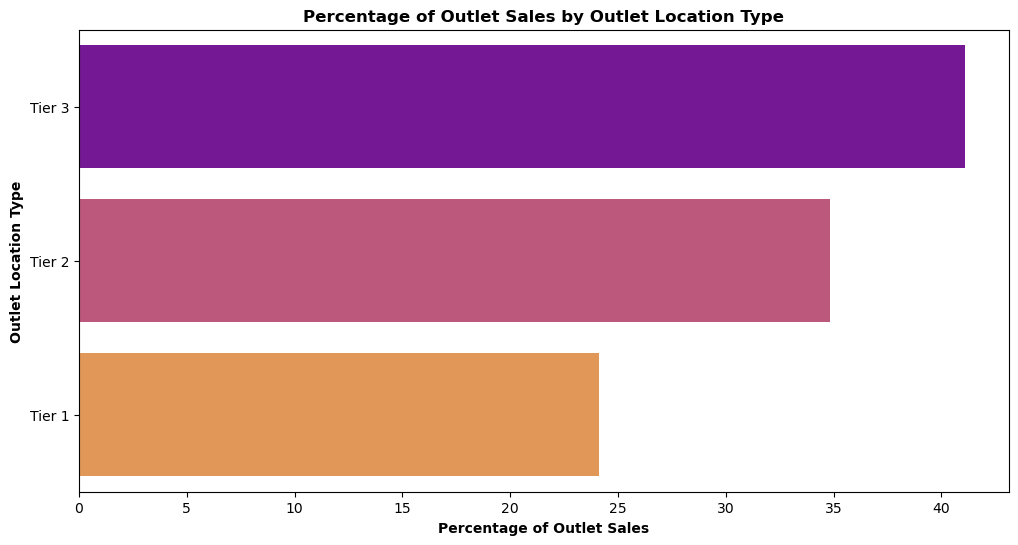

In [296]:
location_sales_percent = ((location_sales / total_sales)*100).reset_index()
## Define a Matplotlib ax object using sns.barplot()
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=location_sales_percent,
                 y='Outlet_Location_Type',
                 x='Item_Outlet_Sales',
                 order=location_sales_percent.sort_values('Item_Outlet_Sales', ascending=False)['Outlet_Location_Type'],
                 errorbar=None,
                 palette = 'plasma')
## Set the Title
ax.set_title('Percentage of Outlet Sales by Outlet Location Type', fontsize=12, fontweight='bold')
# Set Axes Labels
ax.set_ylabel('Outlet Location Type', fontsize=10, fontweight='bold')
ax.set_xlabel('Percentage of Outlet Sales', fontsize=10, fontweight='bold');

- Prediction: Tier 3 Outlet Location Types make the biggest contribution to total sales, with 41% of the sales coming from these outlets. On the other hand, Tier 1 Outlet Location Types have the smallest contribution, accounting for only 24% of the total sales.

## **Preprocessing for Machine Learning**

### **Inspect Data**

#### **shape()**

In [297]:
df_ml.shape
print(f'There are {df_ml.shape[0]} rows, and {df_ml.shape[1]} columns.')

There are 8523 rows, and 12 columns.


#### **Info()**

In [298]:
#Info()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **head()**

In [299]:
#Head()
df_ml.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### **describe()**

In [300]:
#Descriptive statistics for numeric columns
df_ml.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [301]:
#Descriptive statistics for categoric columns
df_ml.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


### **Performing Preprocessing Data**

In [302]:
# Checking for Duplicates
df_ml.duplicated().sum()

0

-There are 0 duplicates

In [303]:
# Checking missing values
df_ml.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### **Data Consistency**

##### **Data Consistency- Categorical Columns**




In [304]:
# save list of categorical column name.
categorical_col = df_ml.select_dtypes('object').columns
categorical_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [305]:
# Check for nunique for categorical columns
for col in categorical_col:
  print(f'Value Counts for {col}')
  print(df_ml[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [306]:
#Drop 'Item_Identifier'
df_ml.drop(columns = 'Item_Identifier', inplace = True)
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


**Cardinality**
- The column "ITem_Identifier" has 1559 unique values.
- High cardinality will create a very sparse dataset when it is One Hot Encoded, which can negatively impact the models' metrics, and greatly increase processing times.
- It will be better to drop this column.

In [307]:
# Item_Fat_Content- fix the values
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace(['low fat' , 'LF'], 'Low Fat')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('reg' , 'Regular')
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [308]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


##### **Data Consistency- Numerical Columns**

In [309]:
# Have list of numerical column name.
numerical_col = df_ml.select_dtypes(['int', 'float']).columns
numerical_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [310]:
# check for nunique for numerical columns
for col in numerical_col:
  print(f'Value Counts for {col}')
  print(df_ml[col].value_counts())
  print('\n')

Value Counts for Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


Value Counts for Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value Counts for Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


Value Counts for Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


Value Counts for Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845

### **Defining X and y**

In [311]:
#Check and Drop null values in target column Item_Outlet_Sales
df_ml['Item_Outlet_Sales'].isna().sum()

0

- There are 0 null values in target column.

#### Define X and y

In [312]:
## Define X and y
target = 'Item_Outlet_Sales'

X = df_ml.drop(columns=target).copy()
y = df_ml[target].copy()
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


#### Train-Test-Split

In [313]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [314]:
X_test.shape

(2131, 10)

In [315]:
X_train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

### **Create 3 Pipelines**

The data is going to divided as follows:

- numeric columns:
  - Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year
- ordinal categorical columns :
  - Item_Fat_Content, Outlet_Size, Outlet_Location_Type
- nominal categorical columns :
  - Item_Type, Outlet_Identifier, Outlet_Type
and preprocess each subset differently.


#### 1. Numeric

In [316]:
!pip install scikit-learn

In [317]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA

# Save list of number column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# Transformers
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe

# Tuple
numeric_tuple = ('numeric',num_pipe, num_cols)

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


#### 2. Ordinal

In [319]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
from sklearn.preprocessing import OrdinalEncoder


# Save list of number column names
ordinal_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']

# Ordered Category Lists
Item_Fat_Content_list = ['Low Fat', 'Regular']
Outlet_Size_list = ['Small', 'Medium', 'High']
Outlet_Location_list = ['Tier 1', 'Tier 2', 'Tier 3']


# Transformers

ord_encoder = OrdinalEncoder(categories=[Item_Fat_Content_list, Outlet_Size_list, Outlet_Location_list])
freq_imputer = SimpleImputer(strategy='most_frequent')

# you might have 100 diff cat for ordinal so its getting out of range so good to scale
scaler_ord = StandardScaler()

# Pipeline
ord_pipe = make_pipeline(freq_imputer, ord_encoder, scaler_ord)

# Tuple
ord_tuple = ('ordinal',ord_pipe, ordinal_cols)

#### 2. Nominal

In [320]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA

# Save list of nominal column names
nominal_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns

# Transformers

missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Pipeline
nom_pipe = make_pipeline(missing_imputer , ohe_encoder)

# Tuple
ohe_tuple = ('categorical',nom_pipe, nominal_cols)

### **Column Transformer**

In [321]:
#Preprocessing ColumnTransformer
preprocessor = ColumnTransformer([numeric_tuple, ord_tuple, ohe_tuple], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

## **Machine Learning - Training the Models**

#### Evaluate Model Performance

In [322]:
#function for true and predicted values
# print MAE, MSE, RMSE, and R2 metrics for the model
def eval_regression(y_true, y_pred, name='model'):
  """Uses true targets and predictions from a regression model and prints the metrics(MAE, MSE, RMSE and R2 Score)
  set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae= mean_absolute_error(y_true, y_pred)
  mse= mean_squared_error(y_true,y_pred)
  rmse= np.sqrt(mse)
  r2= r2_score(y_true,y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:,.4f}\n')

#### Linear Regression Model

In [323]:
#Make and fit model
lr_pipe = make_pipeline(preprocessor,LinearRegression())
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [324]:
#Make predictions using training and testing data
training_preds = lr_pipe.predict(X_train)
testing_preds = lr_pipe.predict(X_test)
training_preds

array([3765.25, 2669.75, 2576.  , ..., 3736.75, 1965.25, 1485.  ])

In [325]:
##Evaluate Model's Performance
eval_regression(y_train, training_preds, name='Training')
eval_regression(y_test, testing_preds, name='Testing')

Training Scores
MAE: 847.5685 
MSE: 1,298,442.9052 
RMSE: 1,139.4924 
R2: 0.5613

Testing Scores
MAE: 804.6040 
MSE: 1,194,463.7945 
RMSE: 1,092.9153 
R2: 0.5671



**Observations**
  - According to the MAE scores since model seems to be a little underfitting.
  - However, as per the R2 scores, the model is working well with both test and train data.

#### Decision Tree Model

In [326]:
#Make and fit model
dt_pipe = make_pipeline(preprocessor,DecisionTreeRegressor(random_state=42))
dt_pipe.fit(X_train, y_train)

#Make predictions using training and testing data
training_preds = dt_pipe.predict(X_train)
testing_preds = dt_pipe.predict(X_test)

In [327]:
##Evaluate Model's Performance
eval_regression(y_train, training_preds, name='Training')
eval_regression(y_test, testing_preds, name='Testing')

Training Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000

Testing Scores
MAE: 1,033.4472 
MSE: 2,228,825.9330 
RMSE: 1,492.9253 
R2: 0.1922



##### Tuning Decision Tree Regressor Model

In [328]:
#Create range of max_depth value
depths = range(1, dt_pipe['decisiontreeregressor'].get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index = depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  #put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, tree)

  #fit the model
  tree_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [329]:
scores

,Train,Test
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582625,0.584005
5,0.60394,0.59471
6,0.615161,0.582504
7,0.626843,0.576691
8,0.643832,0.55874
9,0.665649,0.539813
10,0.685258,0.532462


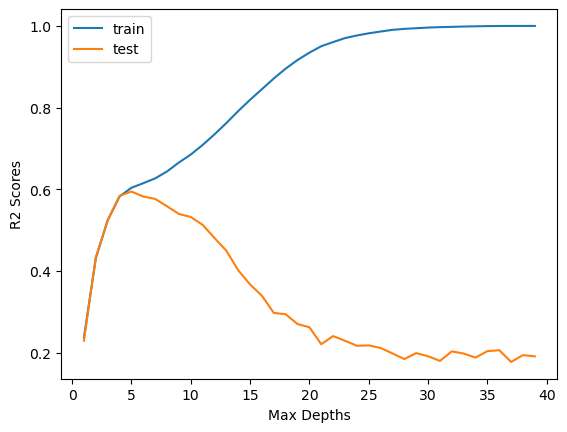

In [330]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [331]:

#sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

- Best Depth for Decision Tree Regressor Model is 5.

In [332]:
#Reevaluate Decision Tree using the best_depth
best_dt = DecisionTreeRegressor(random_state=42, max_depth = best_depth)

best_dt_pipe = make_pipeline(preprocessor, best_dt)

best_dt_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
eval_regression(y_train, best_dt_pipe.predict(X_train), name = 'training')

print('Testing Scores for High Variance Decision Tree')
eval_regression(y_test, best_dt_pipe.predict(X_test), name = 'testing')

Training Scores for High Variance Decision Tree
training Scores
MAE: 762.6102 
MSE: 1,172,122.7729 
RMSE: 1,082.6462 
R2: 0.6039

Testing Scores for High Variance Decision Tree
testing Scores
MAE: 738.3173 
MSE: 1,118,185.9731 
RMSE: 1,057.4431 
R2: 0.5947



**Observations**
  - Tuning the model to the max depth on the decision tree improved the results for the testing data.
  - This model has high bias after tuning to the max depth

#### Random Forest Tree Model

In [333]:
#Make and fit model
rf_pipe = make_pipeline(preprocessor,RandomForestRegressor())
rf_pipe.fit(X_train, y_train)

#Make predictions using training and testing data
training_preds = rf_pipe.predict(X_train)
testing_preds = rf_pipe.predict(X_test)
training_preds

##Evaluate Model's Performance
eval_regression(y_train, training_preds, name='Training')
eval_regression(y_test, testing_preds, name='Testing')

Training Scores
MAE: 296.3968 
MSE: 181,794.2988 
RMSE: 426.3734 
R2: 0.9386

Testing Scores
MAE: 768.3179 
MSE: 1,223,270.7464 
RMSE: 1,106.0157 
R2: 0.5566



**Obervations**
  - This model seems to have improved results on the testing data.
  - The R2 score is at 55% variance, however the RMSE on testing data is off by 1106.0157

##### Tuning Random Forest Tree Model

In [334]:
#create a range of max_depth values
n_estimators = [2000]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

#loop over the values in depths
for n in n_estimators:
  #fit a new model with max_depth
  rf = RandomForestRegressor(random_state = 42, n_estimators=n)

  #put the model into a pipeline
  rf_pipe = make_pipeline(preprocessor, rf)

  #fit the model
  rf_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [335]:
scores

,Train,Test
2000,0.940737,0.558971


In [336]:
#Best n_estimator
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators


2000

In [337]:
#Re-evaluating Random Tree Model using best n_estimator

best_rf = RandomForestRegressor(random_state = 42, n_estimators=best_estimators)

best_rf_pipe = make_pipeline(preprocessor, best_rf)

best_rf_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
eval_regression(y_train, best_rf_pipe.predict(X_train), name = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
eval_regression(y_test, best_rf_pipe.predict(X_test), name = 'testing')



Training Scores for High Variance Decision Tree
training Scores
MAE: 293.1485 
MSE: 175,386.1180 
RMSE: 418.7913 
R2: 0.9407



Testing Scores for High Variance Decision Tree
testing Scores
MAE: 767.8387 
MSE: 1,216,789.9343 
RMSE: 1,103.0820 
R2: 0.5590



**Observations**
  - The tuned model is biased. However, it is produce the best performance on the test data.
  - The R2 score for test data is 55.90%, while the RMSE score for the test data is off by about 1103.0820.

## **Overall Recommendation**
- Model Performance:
    - Overall, the best model is definitely the Linear Regression Model. This model avoids the bias.
    - The Linear Regression Model performed best giving an R2 score for test data at 56.71%, and the RMSE score for test data at 1092.9153.